## Import Libraries

In [71]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [82]:
df = pd.read_csv('covid_19_data.csv')

pd.set_option('display.max_colwidth', 20)
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Inspect the Dataset

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [74]:
# Check for missing values
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [75]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [76]:
# Check for negative entries
negatives = (df[['Confirmed', 'Deaths', 'Recovered']] < 0).sum()
print(negatives)

Confirmed    1
Deaths       2
Recovered    3
dtype: int64


In [77]:
# List all unique countries
unique_countries = df['Country/Region'].unique()
print(unique_countries)

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'China' 'Kiribati' 'Singapore' 'Philippines' 'Malaysia'
 'Vietnam' 'Australia' 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal'
 'Canada' 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland'
 'United Arab Emirates' 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain'
 'Belgium' 'Others' 'Egypt' 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman'
 'Afghanistan' 'Bahrain' 'Kuwait' 'Austria' 'Algeria' 'Croatia'
 'Switzerland' 'Pakistan' 'Georgia' 'Greece' 'North Macedonia' 'Norway'
 'Romania' 'Denmark' 'Estonia' 'Netherlands' 'San Marino' ' Azerbaijan'
 'Belarus' 'Iceland' 'Lithuania' 'New Zealand' 'Nigeria' 'North Ireland'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan'
 'Czech Republic' 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal'
 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile'
 'Jordan' 'Ukraine' 'Saint Barthelemy' 'Hungary' 'Faroe Islands'
 'Gibraltar' 'Liechtenstei

## Data Preprocessing

In [83]:
# Step 1: Convert 'ObservationDate' to datetime format
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Step 2: Convert columns to integers
df['Confirmed'] = df['Confirmed'].astype(int)
df['Deaths'] = df['Deaths'].astype(int)
df['Recovered'] = df['Recovered'].astype(int)

# Step 3: Convert 'Last Update' to datetime format, handling errors
df['Last Update'] = df['Last Update'].ffill()
df['Last Update'] = pd.to_datetime(df['Last Update'], format='%m/%d/%Y %H:%M', errors='coerce')

# Step 4: Remove rows with negative values
df = df[(df['Confirmed'] >= 0) & (df['Deaths'] >= 0) & (df['Recovered'] >= 0)]

In [84]:
# Verify data type after conversion
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                   int64
Deaths                      int64
Recovered                   int64
dtype: object

In [85]:
# View the cleaned dataset
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


# 📈 Exploratory Data Analysis 📈

## Summary Statistics

In [86]:
df.describe().round(2)

,SNo,ObservationDate,Last Update,Confirmed,Deaths,Recovered
count,306425.00,306425,173,306425.00,306425.00,306425.00
mean,153215.20,2020-11-06 01:55...,2020-01-29 22:51...,85673.02,2036.43,50423.80
min,1.00,2020-01-22 00:00:00,2020-01-22 17:00:00,0.00,0.00,0.00
25%,76607.00,2020-07-30 00:00:00,2020-01-31 08:15:00,1042.00,13.00,11.00
50%,153217.00,2020-11-10 00:00:00,2020-01-31 23:59:00,10376.00,192.00,1751.00
75%,229823.00,2021-02-18 00:00:00,2020-02-01 02:13:00,50752.00,1322.00,20270.00
max,306429.00,2021-05-29 00:00:00,2020-02-01 19:53:00,5863138.00,112385.00,6399531.00
std,88459.13,NaN,NaN,277552.40,6410.98,201507.05


## Correlation Analysis

<Axes: >

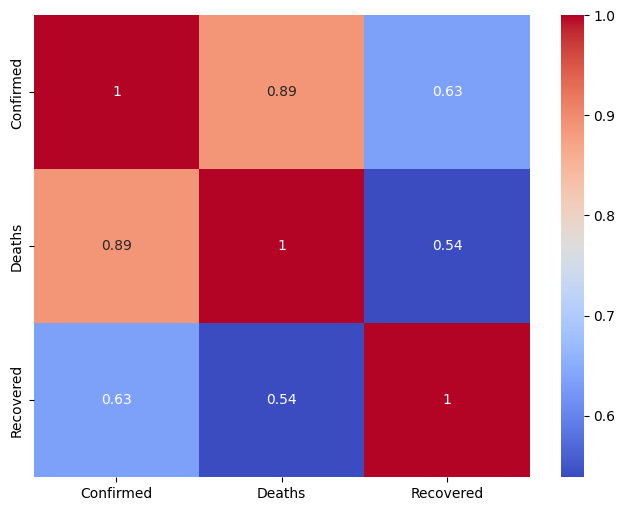

In [100]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered']].corr(), annot=True, cmap='coolwarm')

# 📊 Time Series & Trends Analysis 📊

## Total Cases Over Time

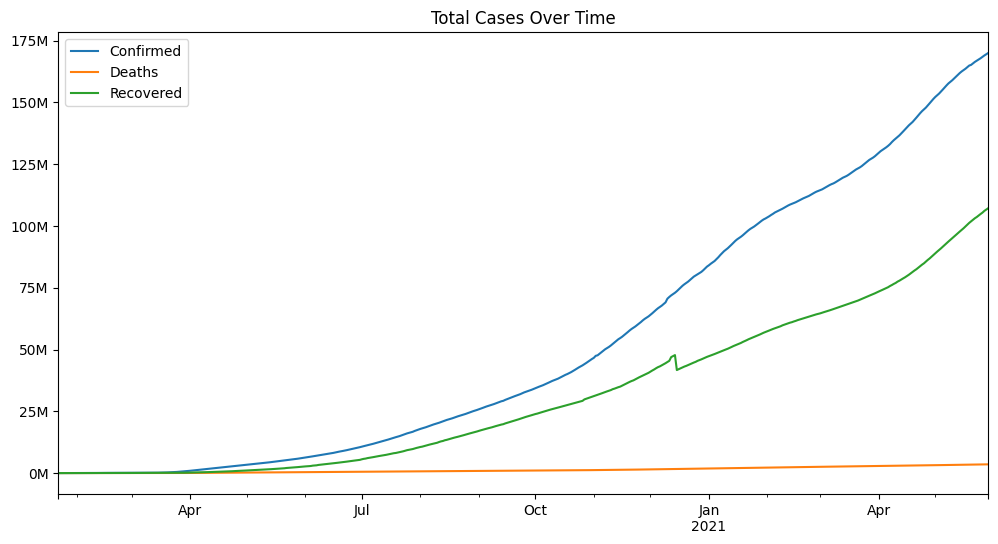

In [119]:
time_series = df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum()
time_series_in_million = time_series / 1_000_000

# Plot the chart
fig, ax = plt.subplots(figsize=(12,6))
time_series_in_million.plot(ax=ax, title="Total Cases Over Time")

ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}M'))
plt.xlabel('')

plt.show()

## Active Cases Over Time

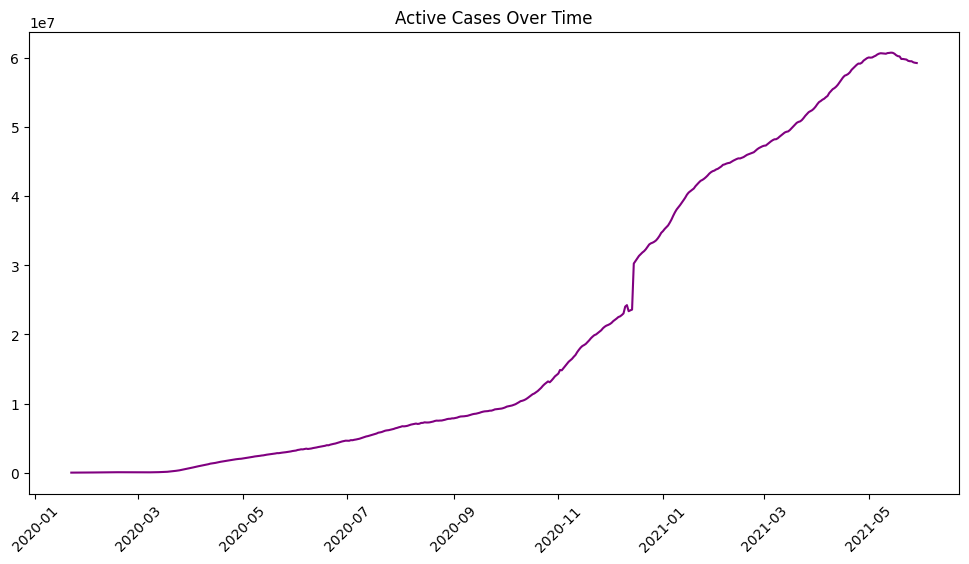

In [118]:
df['Active Cases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
active_cases_trend = df.groupby('ObservationDate')['Active Cases'].sum()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=active_cases_trend.index, y=active_cases_trend.values, color='purple')
plt.title('Active Cases Over Time')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

## Daily New Confirmed Cases

<Axes: title={'center': 'Daily New Confirmed Cases'}, xlabel='ObservationDate'>

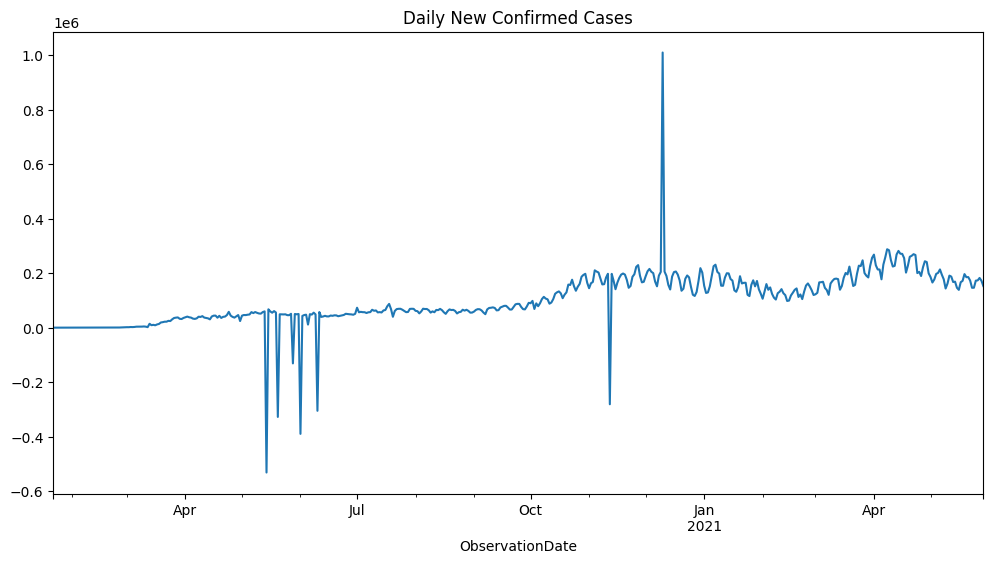

In [106]:
df['New Confirmed'] = df.groupby('Country/Region')['Confirmed'].diff().fillna(0)
df.groupby('ObservationDate')['New Confirmed'].sum().plot(figsize=(12,6), title='Daily New Confirmed Cases')

# 📊 Geographical & Regional Insights 📊

## Top 10 Worst-Affected Countries

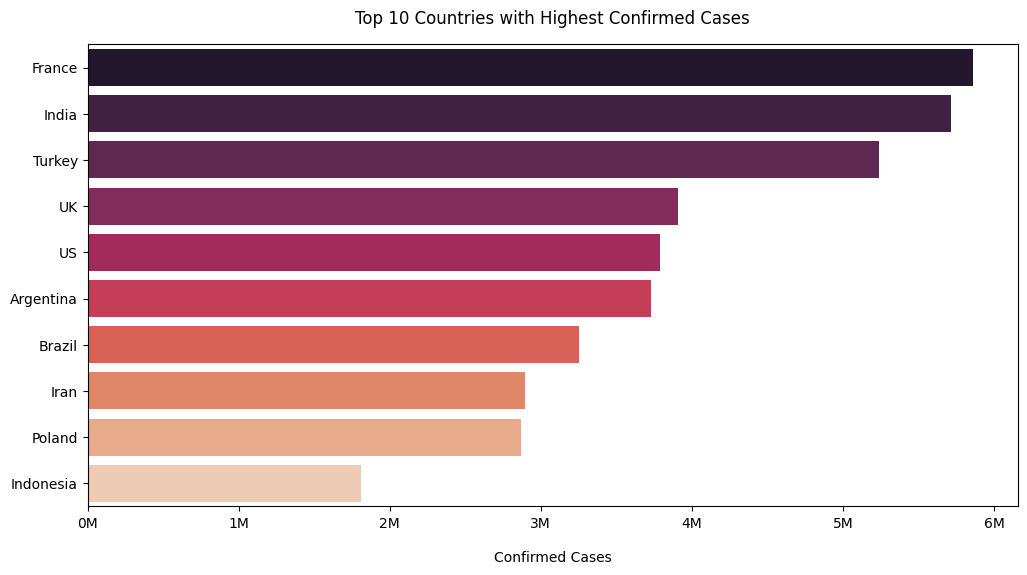

In [117]:
country_wise = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].max()
top_countries = country_wise.sort_values(by='Confirmed', ascending=False).head(10)

# Plot the chart
plt.figure(figsize=(12,6))
sns.barplot(y=top_countries.index, x=top_countries['Confirmed'], palette='rocket')

formatter = FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('Top 10 Countries with Highest Confirmed Cases', pad = 15)
plt.xlabel('Confirmed Cases', labelpad = 15)
plt.ylabel('')

plt.show()

## Heatmap: Country vs Cases

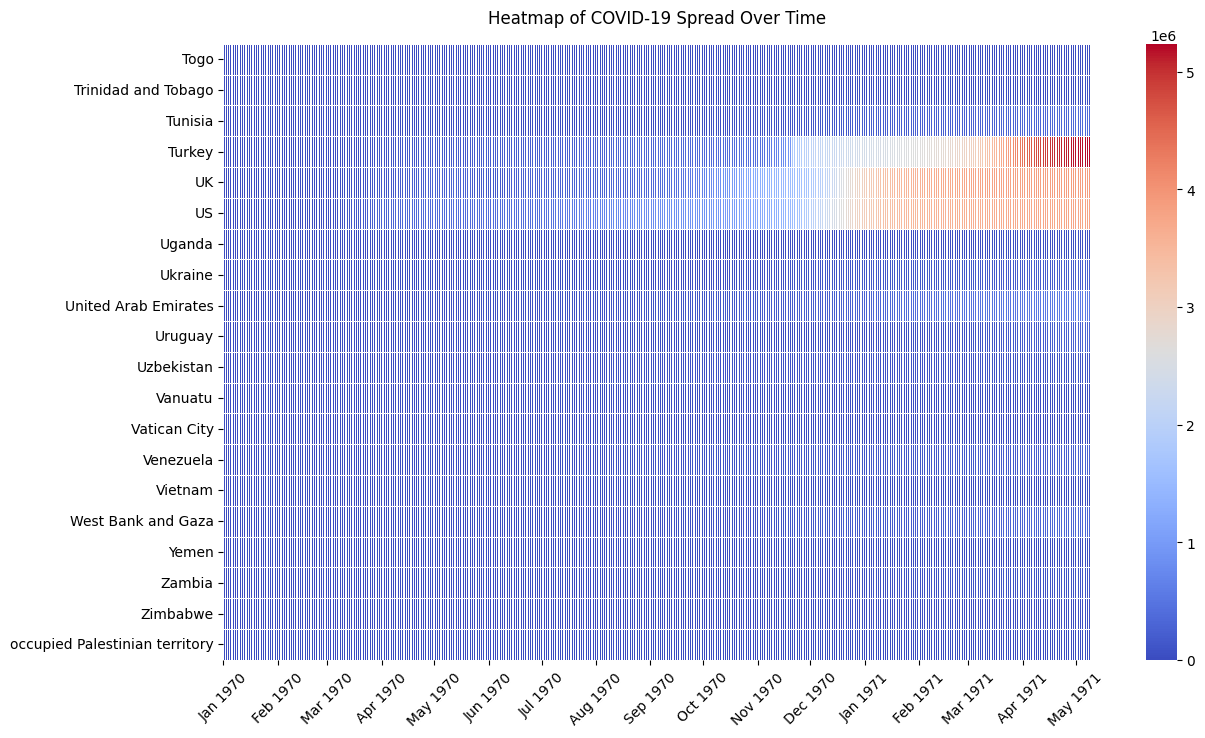

In [116]:
# Pivot table for heatmap
pivot = df.pivot_table(values='Confirmed', index='Country/Region', columns='ObservationDate', aggfunc='max')

# Plot heatmap
plt.figure(figsize=(14,8))
sns.heatmap(pivot.fillna(0).iloc[-20:], cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of COVID-19 Spread Over Time', pad = 15)
plt.xlabel('')
plt.ylabel('')

# Set date format as Month Year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.show()

## Mortality Rate per Country

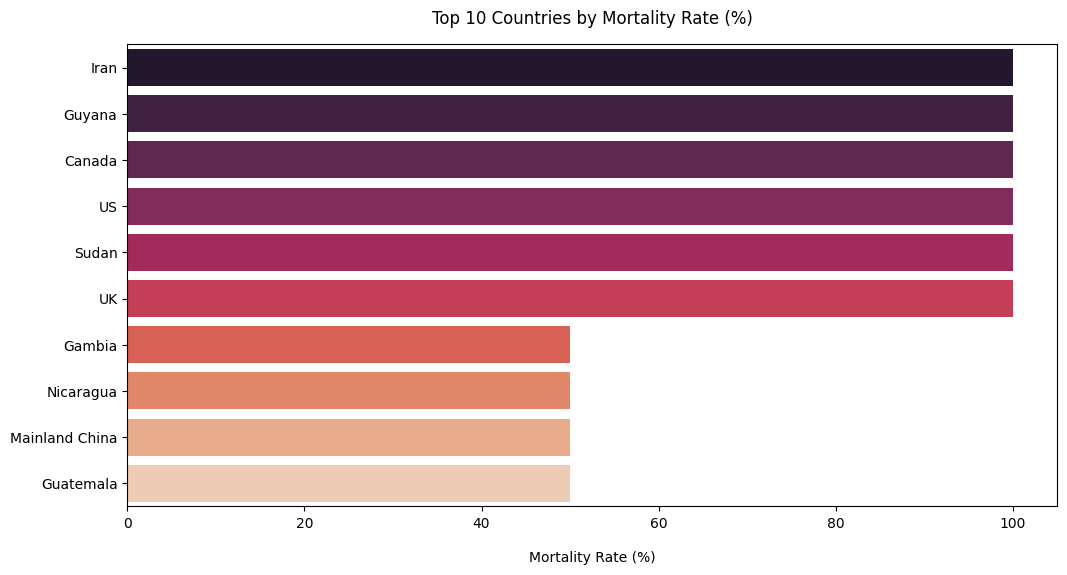

In [113]:
# Calculate Mortality Rate
df['Mortality Rate'] = (df['Deaths'] / df['Confirmed']) * 100

# Remove invalid rows where Mortality Rate is greater than 100%
df_cleaned = df[df['Mortality Rate'] <= 100]

# Get the top 10 countries by Mortality Rate
top_mortality = df_cleaned.groupby('Country/Region')['Mortality Rate'].max().sort_values(ascending=False).head(10)

# Plot the chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_mortality.values, y=top_mortality.index, palette='rocket')
plt.title('Top 10 Countries by Mortality Rate (%)', pad = 15)
plt.xlabel('Mortality Rate (%)', labelpad = 15)
plt.ylabel('')
plt.show()

## Recovery Rate per Country

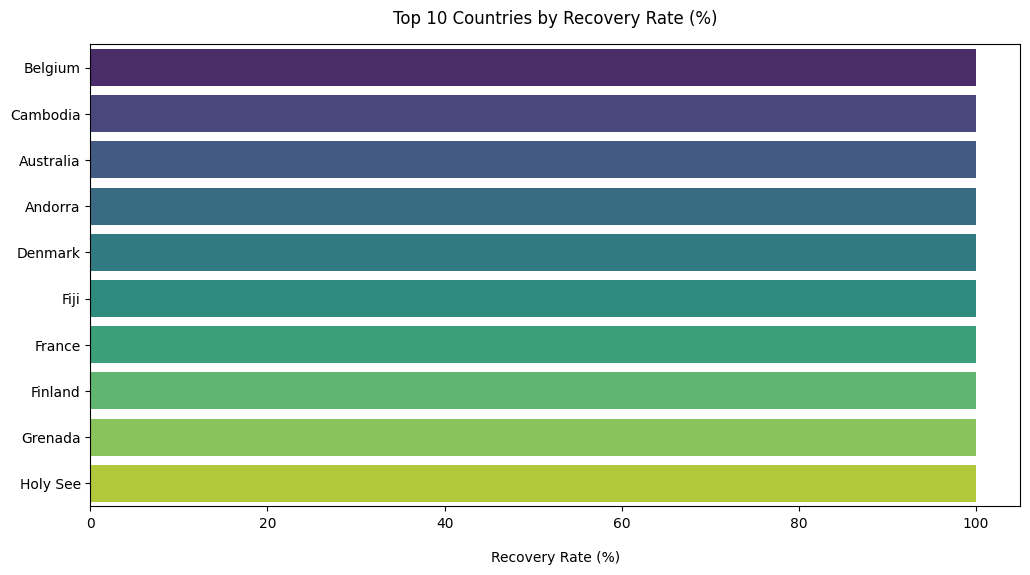

In [114]:
# Calculate Recovery Rate
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100

# Remove invalid rows where Recovery Rate is greater than 100%
df_cleaned = df[df['Recovery Rate'] <= 100]

# Get the top 10 countries by Recovery Rate
top_recovery = df_cleaned.groupby('Country/Region')['Recovery Rate'].max().sort_values(ascending=False).head(10)

# Plot the chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_recovery.values, y=top_recovery.index, palette='viridis')
plt.title('Top 10 Countries by Recovery Rate (%)', pad = 15)
plt.xlabel('Recovery Rate (%)', labelpad = 15)
plt.ylabel('')
plt.show()